# Exploratory Data Analysis

In [ ]:
!pip install pandas_profiling
!pip install sweetviz

In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [ ]:
data1 = pd.read_csv("D:/DS Files/DS Assingments/Excel Data Sheets/data_clean.csv")

In [ ]:
data1

In [ ]:
data1.tail(10)

In [ ]:
data1

In [ ]:
#Data Structure 
type(data1)
data1.shape

In [ ]:
#data types
data1.dtypes

# Data type conversion

In [ ]:
data1.info()

In [ ]:
data1

In [ ]:
data2=data1.iloc[:,1:]

In [ ]:
data2

In [ ]:
#The method .copy() is used here so that any changes made in new DataFrame don't get reflected in the original one
data=data2.copy()

In [ ]:
data['Month']=pd.to_numeric(data['Month'],errors='coerce')
data['Temp C']=pd.to_numeric(data['Temp C'],errors='coerce')# coerce will introduce NA values for non numeric data in the columns
data['Weather']=data['Weather'].astype('category')           #data['Wind']=data['Wind'].astype('int64')

In [ ]:
data.info()

# Duplicates

In [ ]:
#Count of duplicated rows
data[data.duplicated()].shape

In [ ]:
data

In [ ]:
#Print the duplicated rows
data[data.duplicated()]

In [ ]:
data_cleaned1=data.drop_duplicates()

In [58]:
data_cleaned1.shape

(157, 9)

# Drop columns

In [ ]:
data_cleaned2=data_cleaned1.drop('Temp C',axis=1)

In [ ]:
data_cleaned2

# Rename the columns

In [ ]:
#rename the Solar column
data_cleaned3 = data_cleaned2.rename({'Solar.R': 'Solar'}, axis=1)

In [ ]:
data_cleaned3

# Outlier Detection

<AxesSubplot:>

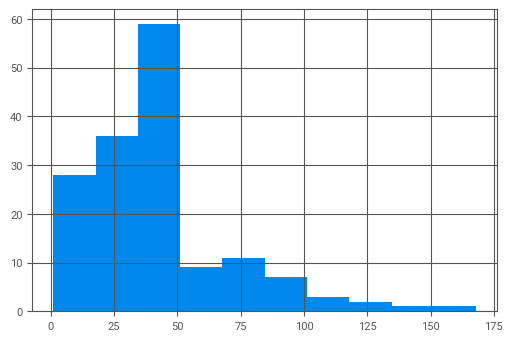

In [65]:
# histogram of Ozone
data_cleaned3['Ozone'].hist()

In [1]:
#Box plot
import mat
bx = plt.boxplot(data_cleaned3.ozone)

ModuleNotFoundError: No module named 'mat'

In [68]:
bx['fliers']

TypeError: 'AxesSubplot' object is not subscriptable

In [63]:
[item.get_ydata() for i in box['fliers']]

TypeError: 'AxesSubplot' object is not subscriptable

In [ ]:
#Descriptive stat
data_cleaned3['Ozone'].describe()

In [ ]:
data_cleaned3

In [ ]:
#Bar plot
data['Weather'].value_counts().plot.bar()

# Missing Values and Imputation

In [ ]:
import seaborn as sns
cols = data_cleaned3.columns 
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(data_cleaned3[cols].isnull(),
            cmap=sns.color_palette(colours))

In [ ]:
data_cleaned3[data_cleaned3.isnull().any(axis=1)].head()

In [ ]:
data_cleaned3.isnull().sum()

In [ ]:
#Mean Imputation
mean = data_cleaned3['Ozone'].mean()
print(mean)

In [ ]:
data_cleaned3['Ozone'] = data_cleaned3['Ozone'].fillna(mean)

In [ ]:
data_cleaned3

In [ ]:
#Missing value imputation for categorical vlaue
#Get the object columns
obj_columns=data_cleaned3[['Weather']]

In [ ]:
obj_columns.isnull().sum()

In [ ]:
#Missing value imputation for categorical vlaue
obj_columns=obj_columns.fillna(obj_columns.mode().iloc[0])

In [ ]:
obj_columns.isnull().sum()

In [ ]:
data_cleaned3.shape

In [ ]:
obj_columns.shape

In [ ]:
#Join the data set with imputed object dataset
data_cleaned4=pd.concat([data_cleaned3,obj_columns],axis=1)

In [ ]:
data_cleaned4.isnull().sum()

# Scatter plot and Correlation analysis

In [ ]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(data_cleaned3)

In [ ]:
#Correlation
data_cleaned3.corr()

# Transformations

#### Dummy Variable

In [2]:
#Creating dummy variable for Weather column
data_cleaned4=pd.get_dummies(data,columns=['Weather'])

NameError: name 'pd' is not defined

In [ ]:
data_cleaned4

In [ ]:
data_cleaned4=data_cleaned4.dropna()

#### Normalization of the data

In [ ]:
#Normalization of the data
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler

In [ ]:
data_cleaned4.values

In [ ]:
array = data_cleaned3.values

scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array[:,0:5])

#transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])


In [ ]:
# Standardize data (0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler

In [ ]:
array = data_cleaned4.values
scaler = StandardScaler().fit(array)
rescaledX = scaler.transform(array)

# summarize transformed data
set_printoptions(precision=2)
print(rescaledX[0:5,:])

# Speed up the EDA process

In [1]:
import pandas_profiling as pp
import sweetviz as sv
EDA_report= pp.ProfileReport(data)
EDA_report.to_file(output_file='report1.html')

NameError: name 'data' is not defined

                                             |                                             | [  0%]   00:00 ->…

KeyboardInterrupt: 

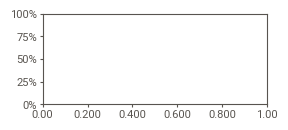

In [57]:
sweet_report = sv.analyze(data)
sweet_report.show_html('weather_report.html')